### Hierarchical clustering with 2D toy datasets
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [14]:
# 載入套件
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [15]:
#設定2D樣板資料
n_samples = 1500
random_state = 100

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Anisotropicly distributed data
x, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
x_aniso = np.dot(x, transformation)
aniso = (x_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],
                            random_state=random_state)

In [20]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}

datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors': 2}), (aniso, {'n_neighbors': 2})]

<Figure size 720x576 with 0 Axes>

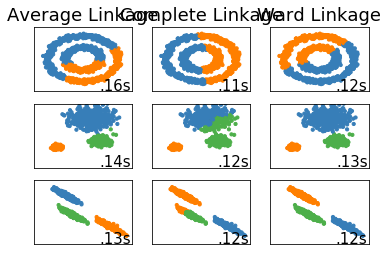

In [19]:
#執行各種樣板資料的繪圖迴圈
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
for  i_dateset, (dataset, algo_params) in enumerate(datasets):
    #複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)
    x, y =dataset
    x = StandardScaler().fit_transform(x)
    
    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],
                                          linkage='ward')
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],
                                              linkage='complete')
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],
                                             linkage='average')
    clustering_algorithms = (('Average Linkage', average),
                            ('Complete Linkage',complete),
                            ('Ward Linkage', ward))
    #繪製三種圖型
    for name, algorithm in clustering_algorithms:
        #t0/t1:紀錄時間差
        t0 = time.time()
        algorithm.fit(x)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(x)
            
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dateset == 0:
            plt.title(name, size=18)
        
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                     int(max(y_pred)+1))))
        plt.scatter(x[:,0], x[:,1], s=10, color=colors[y_pred])
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()